# Data Cleaning:
[general cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)

[python specific](https://realpython.com/python-data-cleaning-numpy-pandas/)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import pearsonr
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv('https://query.data.world/s/hfrvssednec4u4hjxljf4idaaf5fyl')
pd.set_option("display.max_rows", None, "display.max_columns", 100)

In [3]:
df = df.dropna().reset_index(drop=True)
spare_data = df[df.Publisher == 'Unknown'].reset_index()
df = df[df.Publisher != 'Unknown'].reset_index()
df['User_Score'] = df['User_Score'].astype(float)
df = df.drop(['index','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count','User_Score','User_Count','Rating'], axis=1)
display(df.head())

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,Nintendo
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,Nintendo
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,Nintendo
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,Nintendo
4,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,Nintendo


In [4]:
platform_counts = pd.DataFrame(df['Platform'].value_counts()).reset_index()
platform_counts = platform_counts.rename(columns={'index':'Platform','Platform':'Count'})

genre_counts = pd.DataFrame(df['Genre'].value_counts()).reset_index()
genre_counts = genre_counts.rename(columns={'index':'Genre','Genre':'Count'})

publisher_counts = pd.DataFrame(df['Publisher'].value_counts()).reset_index()
publisher_counts = publisher_counts.rename(columns={'index':'Publisher','Publisher':'Count'}).iloc[:20,:]

dev_counts = pd.DataFrame(df['Developer'].value_counts()).reset_index()
dev_counts = dev_counts.rename(columns={'index':'Developer','Developer':'Count'}).iloc[:20,:]

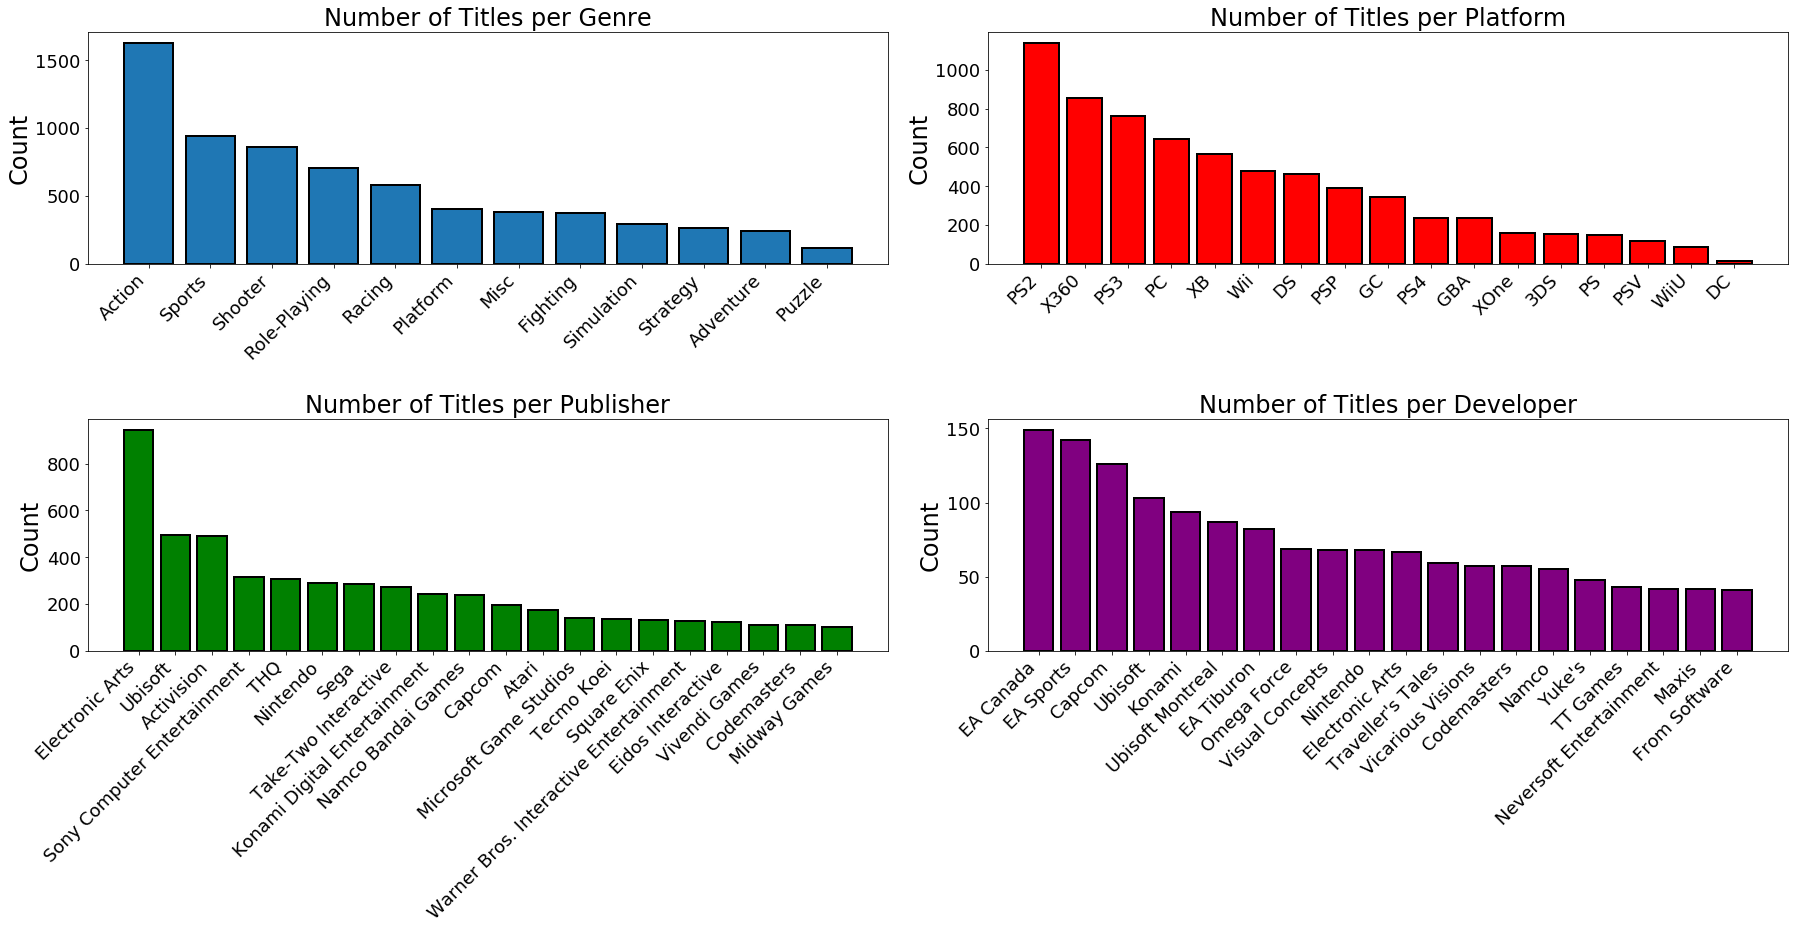

In [5]:
font = {'size' : 18}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(2, 2, figsize=(25,10))

plt.sca(ax[0][0])
plt.xticks(rotation=45, ha="right")
ax[0][0].set_title('Number of Titles per Genre', fontsize=24)
ax[0][0].set_ylabel('Count', fontsize=24)

plt.sca(ax[0][1])
plt.xticks(rotation=45, ha="right")
ax[0][1].set_title('Number of Titles per Platform', fontsize=24)
ax[0][1].set_ylabel('Count', fontsize=24)

plt.sca(ax[1][0])
plt.xticks(rotation=45, ha="right")
ax[1][0].set_title('Number of Titles per Publisher', fontsize=24)
ax[1][0].set_ylabel('Count', fontsize=24)

plt.sca(ax[1][1])
plt.xticks(rotation=45, ha="right")
ax[1][1].set_title('Number of Titles per Developer', fontsize=24)
ax[1][1].set_ylabel('Count', fontsize=24)

fig.tight_layout(pad=1.0, w_pad=2.0, h_pad=5.0)
    
ax[0][0].bar(genre_counts.Genre, genre_counts.Count, edgecolor='black', linewidth=2)
ax[0][1].bar(platform_counts.Platform, platform_counts.Count, color='red', edgecolor='black', linewidth=2)
ax[1][0].bar(publisher_counts.Publisher, publisher_counts.Count, color='green', edgecolor='black', linewidth=2)
ax[1][1].bar(dev_counts.Developer, dev_counts.Count, color='purple', edgecolor='black', linewidth=2)
    
plt.show()

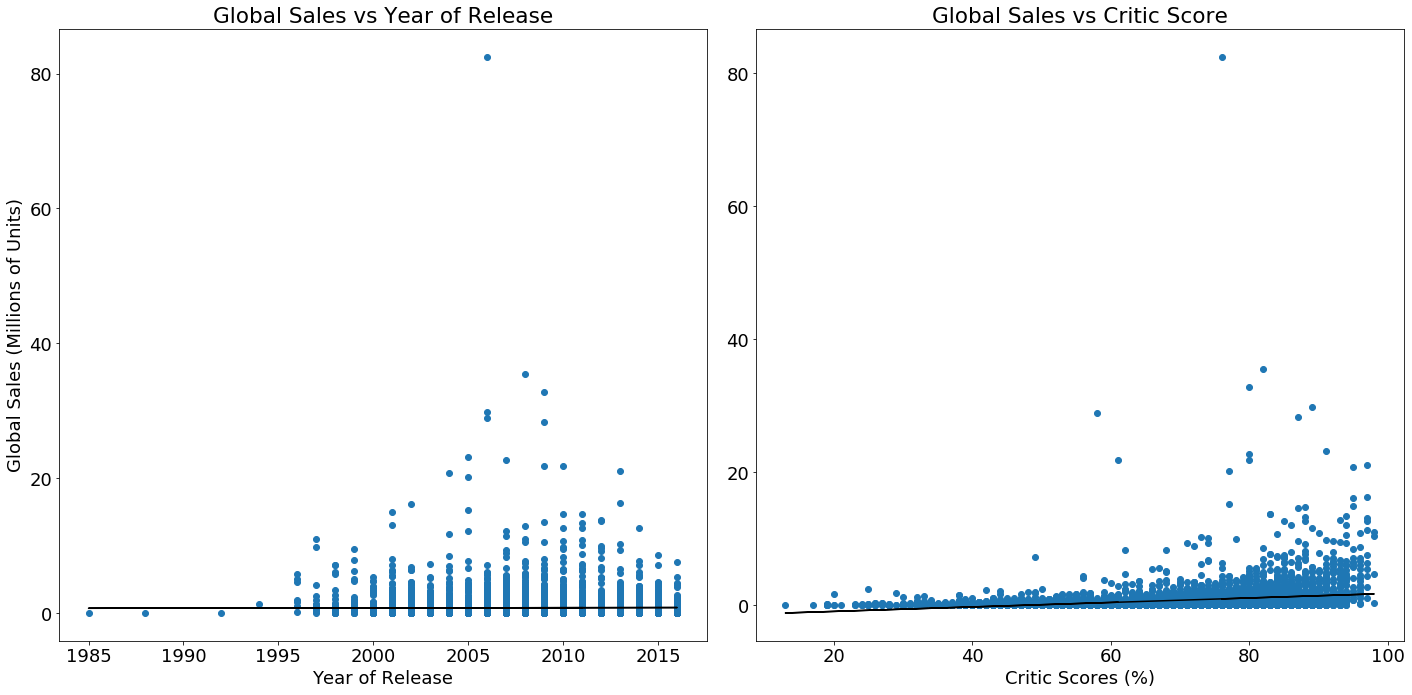

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.scatter(df.Year_of_Release, df.Global_Sales)
m, b = np.polyfit(df.Year_of_Release, df.Global_Sales, 1)
ax1.plot(df.Year_of_Release, m*(df.Year_of_Release)+b,color='black')
ax1.set_title('Global Sales vs Year of Release')
ax1.set_xlabel('Year of Release')
ax1.set_ylabel('Global Sales (Millions of Units)')

ax2.scatter(df.Critic_Score, df.Global_Sales)
m, b = np.polyfit(df.Critic_Score, df.Global_Sales, 1)
ax2.plot(df.Critic_Score, m*(df.Critic_Score)+b,color='black')
ax2.set_title('Global Sales vs Critic Score')
ax2.set_xlabel('Critic Scores (%)')

fig.tight_layout()

plt.show()

In [ ]:
model_dict = {}

f = 'Global_Sales ~ 1'
model = smf.ols(formula=f, data=df)
result1 = model.fit()
model_dict[f] = result1.aic

print(result1.summary())

In [ ]:
f = 'Global_Sales ~ Critic_Score'
model = smf.ols(formula='Global_Sales ~ Critic_Score', data=df)
result2 = model.fit()
model_dict[f] = result2.aic

print(result2.summary())

In [ ]:
f = 'Global_Sales ~ C(Genre)'
model = smf.ols(formula=f, data=df)
result3 = model.fit()
model_dict[f] = result3.aic

f = 'Global_Sales ~ C(Publisher)'
model = smf.ols(formula=f, data=df)
result4 = model.fit()
model_dict[f] = result4.aic

f = 'Global_Sales ~ C(Platform)'
model = smf.ols(formula=f, data=df)
result5= model.fit()
model_dict[f] = result5.aic

f = 'Global_Sales ~ C(Developer)'
model = smf.ols(formula=f, data=df)
result6 = model.fit()
model_dict[f] = result6.aic

f = 'Global_Sales ~ Year_of_Release'
model = smf.ols(formula=f, data=df)
result7 = model.fit()
model_dict[f] = result7.aic

f = 'Global_Sales ~ Critic_Score : C(Genre)'
model = smf.ols(formula=f, data=df)
result8 = model.fit()
model_dict[f] = result8.aic

f = 'Global_Sales ~ Critic_Score : C(Platform)'
model = smf.ols(formula=f, data=df)
result9 = model.fit()
model_dict[f] = result9.aic

f = 'Global_Sales ~ Critic_Score : Year_of_Release'
model = smf.ols(formula=f, data=df)
result10 = model.fit()
model_dict[f] = result10.aic

f = 'Global_Sales ~ C(Platform) : C(Genre)'
model = smf.ols(formula=f, data=df)
result11 = model.fit()
model_dict[f] = result11.aic

f = 'Global_Sales ~ C(Platform) : Year_of_Release'
model = smf.ols(formula=f, data=df)
result12 = model.fit()
model_dict[f] = result12.aic

f = 'Global_Sales ~ Year_of_Release : C(Genre)'
model = smf.ols(formula=f, data=df)
result13 = model.fit()
model_dict[f] = result13.aic

In [ ]:
print('Formula for "good" model: ' + min(model_dict, key=model_dict.get))
print('Formula for "bad" model: ' + max(model_dict, key=model_dict.get))

In [ ]:
print(result9.summary())
print(result5.summary())

In [ ]:
df['Good_Predicted'] = result9.predict(df)
df['Good_Residual'] = df['Global_Sales'].sub(df['Good_Predicted'], axis=0)
df['Good_Residual'] = df['Good_Residual'].abs()

df['Bad_Predicted'] = result7.predict(df)
df['Bad_Residual'] = df['Global_Sales'].sub(df['Bad_Predicted'], axis=0)
df['Bad_Residual'] = df['Bad_Residual'].abs()

display(df.head())

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df.Global_Sales, df.Good_Residual, color='red')
plt.plot(df.Global_Sales, df.Bad_Residual)
plt.xlabel('Global Sales')
plt.ylabel('Abs Value of Residual')
plt.title("Global Sales vs. Residuals \n (in Million Units)")

plt.show()

In [ ]:
g_resid_score = 0
b_resid_score = 0
for i in df.index:
    g_resid = df.iloc[i, 9]
    b_resid = df.iloc[i, 11]
    if g_resid < b_resid:
        g_resid_score += 1
    else:
        b_resid_score += 1
print('Number of points more closely predicted by the "good" model: {}'.format(g_resid_score))
print('Number of points more closely predicted by the "bad" model: {}'.format(b_resid_score))

In [ ]:
spare_data = spare_data.drop(['index','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1)

spare_data['Good_Predicted'] = result9.predict(spare_data)
spare_data['Good_Residual'] = spare_data['Global_Sales'].sub(spare_data['Good_Predicted'], axis=0)
spare_data['Good_Residual'] = spare_data['Good_Residual'].abs()

spare_data['Bad_Predicted'] = result7.predict(spare_data)
spare_data['Bad_Residual'] = spare_data['Global_Sales'].sub(spare_data['Bad_Predicted'], axis=0)
spare_data['Bad_Residual'] = spare_data['Bad_Residual'].abs()
display(spare_data.head())

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(spare_data.Global_Sales, spare_data.Good_Residual, color='red')
plt.plot(spare_data.Global_Sales, spare_data.Bad_Residual)
plt.xlabel('Global Sales')
plt.ylabel('Abs Value of Residual')
plt.title("Global Sales vs. Residuals for Spare Data \n (in Million Units)")

plt.show()

In [ ]:
g_resid_score = 0
b_resid_score = 0
for i in spare_data.index:
    g_resid = spare_data.iloc[i, 6]
    b_resid = spare_data.iloc[i, 8]
    if g_resid < b_resid:
        g_resid_score += 1
    else:
        b_resid_score += 1
print('Number of points more closely predicted by the "good" model: {}'.format(g_resid_score))
print('Number of points more closely predicted by the "bad" model: {}'.format(b_resid_score))